# CIFAR-10

## LOAD the dataset

In [17]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

In [18]:
data_train, data_test = cifar10.load_data()

(images, labels) = data_train

(images_train, labels_train) = images[:40000], labels[:40000]
(images_validation, labels_validation) = images[40000:], labels[40000:]

(images_test, labels_test) = data_test

In [19]:
print(images_train.shape)
print(labels_train.shape)
print(images_validation.shape)
print(labels_validation.shape)
print(images_test.shape)
print(labels_test.shape)

(40000, 32, 32, 3)
(40000, 1)
(10000, 32, 32, 3)
(10000, 1)
(10000, 32, 32, 3)
(10000, 1)


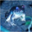

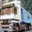

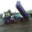

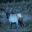

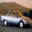

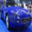

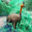

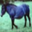

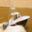

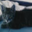

In [20]:
for i in range(10):
  cv2_imshow(images_train[i])

## Create a deep learning model

In [21]:
# TODO: Implement a CNN model
'''
train_data: (n_train, 32, 32, 3)
train_labels: (n_train, 1)
n_class: 10

Use the AI chatbot to help you. Build a CNN model for the CIFAR-10 dataset.
You don't need an overly large model. You can import whatever you need.
'''
'''Your code here'''


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
def train_model(model, train_data, train_labels=None, epochs=10, batch_size=32,
                criterion=None, optimizer=None, lr=1e-3):
    import tensorflow as tf
    import torch

    tf_gpu_available = tf.config.list_physical_devices('GPU')
    torch_gpu_available = torch.cuda.is_available()

    if isinstance(model, tf.keras.Model):
        device = "GPU" if tf_gpu_available else "CPU"
        print(f"[INFO] Detected TensorFlow model. Using {device}.")

        if optimizer is None:
            optimizer = tf.keras.optimizers.Adam(learning_rate=lr)

        model.compile(optimizer=optimizer,
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])

        model.fit(train_data, train_labels, epochs=epochs, batch_size=batch_size)

    elif isinstance(model, torch.nn.Module):
        device = torch.device("cuda" if torch_gpu_available else "cpu")
        print(f"[INFO] Detected PyTorch model. Using {device}.")
        model.to(device)
        model.train()

        from torch.utils.data import TensorDataset, DataLoader
        dataset = TensorDataset(train_data, train_labels)
        loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

        if optimizer is None:
            optimizer = torch.optim.Adam(model.parameters(), lr=lr)
        if criterion is None:
            criterion = torch.nn.CrossEntropyLoss()

        for epoch in range(epochs):
            total_loss = 0
            for x_batch, y_batch in loader:
                x_batch, y_batch = x_batch.to(device), y_batch.to(device)

                optimizer.zero_grad()
                outputs = model(x_batch)
                loss = criterion(outputs, y_batch)
                loss.backward()
                optimizer.step()
                total_loss += loss.item()

            print(f"Epoch {epoch+1}/{epochs}, Loss: {total_loss:.4f}")

    else:
        raise TypeError("Check the model type!")


In [23]:
train_model(model, images_train, labels_train, epochs=5, batch_size=64, lr=0.0005)

[INFO] Detected TensorFlow model. Using CPU.
Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 48s 74ms/step - accuracy: 0.2380 - loss: 3.5481
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 80s 70ms/step - accuracy: 0.4555 - loss: 1.5012
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 81s 69ms/step - accuracy: 0.5426 - loss: 1.2804
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 83s 70ms/step - accuracy: 0.5893 - loss: 1.1653
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 70ms/step - accuracy: 0.6262 - loss: 1.0604


## Train

## Test

In [24]:
labels = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

In [25]:
def predict_model(model, input_data):
    import tensorflow as tf
    import torch
    import numpy as np

    if isinstance(model, tf.keras.Model):
        return model.predict(input_data)

    elif isinstance(model, torch.nn.Module):
        device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        model.eval()
        model.to(device)

        if isinstance(input_data, np.ndarray):
            input_tensor = torch.from_numpy(input_data).float()
        else:
            input_tensor = input_data

        if len(input_tensor.shape) == 3:
            input_tensor = input_tensor.unsqueeze(0)

        input_tensor = input_tensor.to(device)

        with torch.no_grad():
            output = model(input_tensor)

        return output.cpu().numpy()

    else:
        raise TypeError("Check the model type!")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
Truth: Cat / Pred: Cat


<ipython-input-26-7c8ce1e41be8>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Truth: " + labels[int(labels_test[test_ind])] + " / Pred: "+ labels[np.argmax(result)])


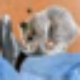

In [26]:
test_ind = 0 # 0~9999

result = predict_model(model, images_test[test_ind].reshape(1, 32, 32, 3))

print("Truth: " + labels[int(labels_test[test_ind])] + " / Pred: "+ labels[np.argmax(result)])
img = cv2.resize(images_test[test_ind]*255, (80, 80))
cv2_imshow(img)

In [ ]:
def evaluate_model(model, test_data, test_labels, criterion=None):
    import tensorflow as tf
    import torch
    import numpy as np

    if isinstance(model, tf.keras.Model):
        print("[INFO] Evaluating TensorFlow model...")
        return model.evaluate(test_data, test_labels, verbose=0)

    elif isinstance(model, torch.nn.Module):
        device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        model.to(device)
        model.eval()

        if isinstance(test_data, np.ndarray):
            x_tensor = torch.from_numpy(test_data).float()
        else:
            x_tensor = test_data

        if isinstance(test_labels, np.ndarray):
            y_tensor = torch.from_numpy(test_labels).long()
        else:
            y_tensor = test_labels

        if len(x_tensor.shape) == 3:
            x_tensor = x_tensor.unsqueeze(0)
        if len(y_tensor.shape) == 0:
            y_tensor = y_tensor.unsqueeze(0)

        x_tensor, y_tensor = x_tensor.to(device), y_tensor.to(device)

        if criterion is None:
            criterion = torch.nn.CrossEntropyLoss()

        with torch.no_grad():
            outputs = model(x_tensor)
            loss = criterion(outputs, y_tensor)
            preds = torch.argmax(outputs, dim=1)
            accuracy = (preds == y_tensor).float().mean().item()

        return loss.item(), accuracy

    else:
        raise TypeError("Check the model type!")

In [27]:
test_loss, test_acc = evaluate_model(model, images_test, labels_test)
print('test accuracy: {:.4f}'.format(test_acc))

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.6001 - loss: 1.1631
test accuracy: 0.5964
